In [1]:
using Statistics
using Plots
theme(:solarized)

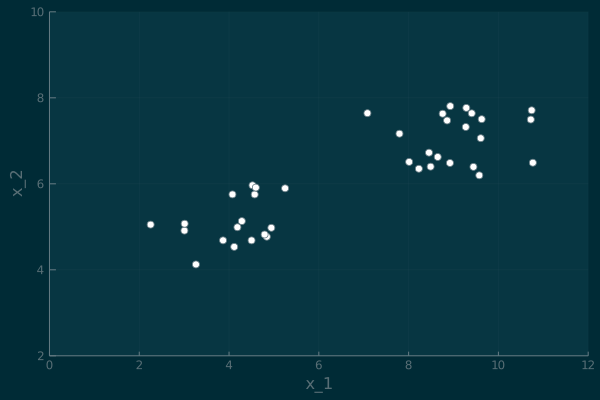

In [2]:
# How to form a circle! 
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    return h.+r*sin.(θ), k.+r*cos.(θ)
end


# Assume the center of cluster1 is (4, 5) with radius 1.8
cluster1 = [(4 + (-1)^rand(1:2)*rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand())
            for _ = 1:17]

# Assume the center of cluster2 is (9, 7) with radius 2.2
cluster2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand())
            for _ = 1:21]

# Make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data, x)
end

# Plot the data
plot(legend = false, 
    xlabel = "x_1", 
    xlim = (0, 12),
    ylabel = "x_2",
    ylim = (2, 10), 
    )

scatter!(data, color = "white")

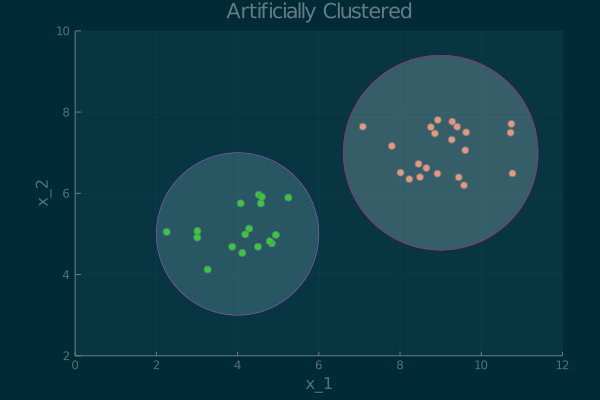

In [16]:
plot(legend = false,
    xlabel = "x_1", 
    xlim = (0, 12),
    ylabel = "x_2",
    ylim = (2, 10), 
    title = "Artificially Clustered")


plot!(circleShape(4, 5, 2.0), 
    seriestype = [:shape, ], 
    lw = 0.5, 
    c = "lightblue", 
    linecolor = "mediumorchid", 
    legend = false, 
    fillalpha = 0.2, 
    aspect_ratio = 1,)

plot!(circleShape(9, 7, 2.4), 
    seriestype = [:shape, ], 
    lw = 0.5, 
    c = "azure", 
    linecolor = "deeppink2", 
    legend = false, 
    fillalpha = 0.2, 
    aspect_ratio = 1)

scatter!(cluster1, 
        color = "limegreen", 
        legend = false)
scatter!(cluster2, 
        legend = false, 
        color = "darksalmon")



$$
 d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } 
$$


In [17]:
function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end;

In [19]:
function k_means_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end;

function k_means_clusters(X, centroids, k)
    distances = k_means_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
            end
        end
    end
    return clusters
end;

function k_means_new_centroids(X, centroids, k)  
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(new_centers, point)
    end
    return new_centers
end;

centroids_test = k_means_new_centroids(data, 
                                      [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))],
                                      2)
for x in centroids_test
    println(x)
end

function k_means_algorithm(X, k, ϵ)
    
    # The following code ensures that each initial center is assigned a unique cluster
    centroids = []
    x_lims = []
    y_lims = []
    sort!(X, by = x->x[1])
    push!(x_lims, X[1][1])
    push!(x_lims, X[end][1])
    sort!(X, by = x->x[2])
    push!(y_lims, X[1][2])
    push!(y_lims, X[end][2])
    m_x = (x_lims[2]-x_lims[1])/k
    m_y = (y_lims[2] -y_lims[1])/k
    centroids = [(x_lims[1], y_lims[1])]
 
    
    for i = 1:k
        push!(centroids, (centroids[i][1] + m_x, centroids[i][2] + m_y))
    end

    # Now for the K-Means algorithm 
    new_centroids = k_means_new_centroids(X, centroids, k)
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ
        centroids, new_centroids = new_centroids, k_means_new_centroids(X, new_centroids, k)
    end
    return new_centroids
end;

(5.594146220625222, 5.548350208880575)
(9.296092585692072, 7.438466983630884)


In [20]:
function predict(point, X, k, ϵ)
    centroids = k_means_algorithm(X, k, ϵ)
    clusters = k_means_clusters(X, centroids, k)
    print("Predicted class of point ", string(point), " is ")
    println("Class ", string(clusters[point]))
end;

In [21]:
predict(data[1], data, 2, 0.1)

Predicted class of point (3.262916164797435, 4.124640669119966) is Class 1


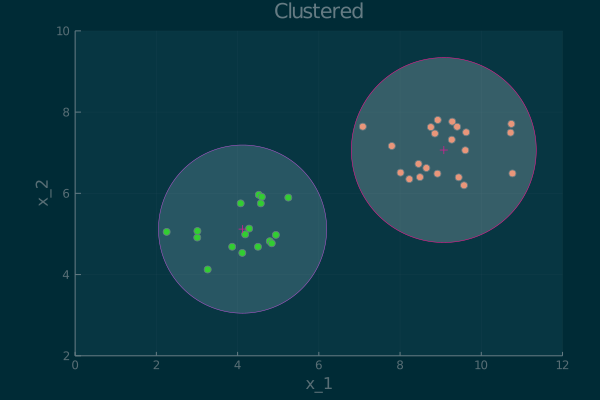

In [30]:
centroids = k_means_algorithm(data, 2, 0.1)
p1 = centroids[1]
p2 = centroids[2]

clusters = k_means_clusters(data, centroids, 2)

radius1 = maximum([euclidean_distance(p, p1) for p in keys(clusters) if clusters[p] == 1]) + .2
radius2 = maximum([euclidean_distance(p, p2) for p in keys(clusters) if clusters[p] == 2]) + .2

plot(legend = false, 
    xlabel = "x_1", 
    xlim = (0, 12),
    ylabel = "x_2",
    ylim = (2, 10), 
    title = "Clustered")

plot!(circleShape(p1[1], p1[2], radius1), 
    seriestype = [:shape, ], 
    lw = 0.5, 
    c = "lightblue", 
    linecolor = "mediumorchid", 
    legend = false, 
    fillalpha = 0.2, 
    aspect_ratio = 1)

plot!(circleShape(p2[1], p2[2], radius2), 
    seriestype = [:shape, ], 
    lw = 0.5, 
    c = "azure", 
    linecolor = "deeppink", 
    legend = false, 
    fillalpha = 0.2, 
    aspect_ratio = 1)

scatter!([x for x in keys(clusters) if clusters[x] == 1], 
        color = "limegreen", 
        legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], 
        legend = false, 
        color = "darksalmon")
scatter!([x for x in centroids], shape = :+, color = "violetred")